# TD3 - Exercice 1
Formule de Sabine :
$$\textrm{Tr}=\frac{0{,}163V}{S\bar{\alpha}}$$
Coefficient d’absorption moyen de Sabine :
$$\bar{\alpha}=\frac{1}{S}\sum_{i=1}^{N}S_i\alpha_i$$

En présence du panneau :
$$\textrm{Tr}_m=\frac{0{,}163V}{(S-S_m)\bar{\alpha}+S_m\alpha_m}$$
Donc :
$$\alpha_m=\bar{\alpha}+\frac{0{,}163V}{S_m}\left(\frac{1}{\textrm{Tr}_m}-\frac{1}{\textrm{Tr}}\right)$$

In [1]:
"""
INSA Lyon - Département Génie Civil et Urbanisme
Travaux dirigés d'acoustique du bâtiment

Copyright © 2021 Christian Obrecht <christian.obrecht@insa-lyon.fr>

Ce document est distribué sous licence Creative Commons CC-BY-NC-SA
"""

from math import log10
from pandas import DataFrame, set_option
import matplotlib.pyplot as plt

# Somme logarithmique d'une liste
def lsum(L):
    return 10*log10(sum([10**(l/10) for l in L]))

# Représentation graphique
def draw(x, lx, y, ly, size = (12, 6), diagram = plt.plot):
    plt.figure(figsize = size)
    plt.xlabel(lx)
    plt.ylabel(ly)
    plt.grid(alpha =.6, linestyle =':')
    diagram(x, y)
    plt.show()

# Présentation sous la forme d'un tableau
def table(d):
    display(DataFrame(d).set_index(list(d.keys())[0]).T)

set_option("display.precision", 3)

Fréquence [Hz],100,125,157,200,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000,5000
$α_0$,0.012,0.015,0.025,0.026,0.026,0.027,0.027,0.025,0.023,0.023,0.025,0.026,0.029,0.036,0.042,0.051,0.065,0.091
$α_1$,0.034,0.082,0.150,0.179,0.226,0.358,0.480,0.652,0.727,0.772,0.895,0.946,0.902,0.862,0.854,0.800,0.919,0.845


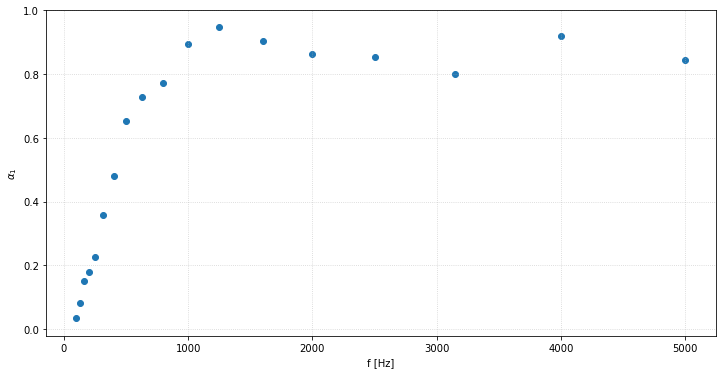

In [2]:
F = [100, 125, 157, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000]
T0 = [13.7, 10.9, 6.5, 6.2, 6.3, 6.1, 6, 6.5, 7.1, 7.1, 6.4, 6.2, 5.6, 4.5, 3.9, 3.2, 2.5, 1.8]
T1 = [12.3,  8.6, 5.0, 4.6, 4.3, 3.5, 3, 2.6, 2.5, 2.4, 2.1, 2.0, 2.0, 1.9, 1.8, 1.7, 1.4, 1.2]

V = 200
S = 200
Sm = 12

α0 = [0.163*V/(S*t) for t in T0]
α1 = [α + 0.163*V/Sm*(1/t1 - 1/t0) for α, t0, t1 in zip(α0, T0, T1)]

table({'Fréquence [Hz]': F, '$α_0$': α0, '$α_1$': α1})

draw(F, 'f [Hz]', α1, r'$\alpha_1$', diagram = plt.scatter)